In [2]:
from imripy import merger_system as ms
from imripy import inspiral
from imripy import halo
from imripy import waveform
from imripy import detector
from halos_natunits import *

In [4]:
m1 = 1e3 * ms.solar_mass_to_pc
m2 = 1 * ms.solar_mass_to_pc
D = 5e8     # luminosity distance
M200 = 1e6   # M_sun
c = 6.6

nfw = NFW(3.8e-22 * ms.g_cm3_to_invpc2, 23.1) #NFW.FromVirial(M200,c)
sp_nfw = Spike_NFW.FromNFW(nfw, m1, 7./3.)
sidm = MatchedSIDM.matching(nfw, 89.7)  # r_m
sidm2 = MatchedSIDM.matching(nfw, 0.1)
sidm3 = MatchedSIDM.matching(nfw, 10)
sidm4 = MatchedSIDM.matching(nfw, 1)
sp_sidm = SpikedSIDM.FromBH(sidm, m1, 7./4.)
sp_sidm2 = SpikedSIDM.FromBH(sidm2, m1, 7./4.)
sp_sidm3 = SpikedSIDM.FromBH(sidm3, m1, 7./4.)
sp_sidm4 = SpikedSIDM.FromBH(sidm4, m1, 7./4.)

## parameters
print('profile 1 cross section = ',sidm.find_sigma_m(nfw,89.7,10e9),sidm.core_dynamic(89.7))
print('profile 2 cross section = ',sidm2.find_sigma_m(nfw,0.1,10e9),sidm2.core_dynamic(0.1))
print('profile 3 cross section = ',sidm3.find_sigma_m(nfw,10,10e9),sidm3.core_dynamic(10))
print('profile 4 cross section = ',sidm4.find_sigma_m(nfw,1,10e9),sidm4.core_dynamic(1))

## SIDM  vs.  SIDM + Spike
sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)  # no DM
sp_1 = ms.SystemProp(m1, m2, sidm, D)
sp_2 = ms.SystemProp(m1, m2, sidm2, D)
sp_3 = ms.SystemProp(m1, m2, sidm3, D)
#sp_4 = ms.SystemProp(m1, m2, sidm4, D)
sp_4 = ms.SystemProp(m1, m2, sp_nfw, D)
sp_5 = ms.SystemProp(m1, m2, sp_sidm, D)
sp_6 = ms.SystemProp(m1, m2, sp_sidm2, D)
sp_7 = ms.SystemProp(m1, m2, sp_sidm3, D)
sp_8 = ms.SystemProp(m1, m2, sp_sidm4, D)

"""
def plotHalo(halo, r_grid):
    #np.geomspace(1, 1e5)
    l, = ax_rho.loglog(r_grid, halo.density(r_grid), label=str(halo))
    ax_m.loglog(r_grid, halo.mass(r_grid), linestyle='--', color=l.get_c()) #halo.mass
    #ax_m.loglog(r_grid, DMHalo.mass(halo, r_grid), linestyle='-.', color=l.get_c()) # check mass function

iso = sidm.inner  #IsoHalo(7.3e11*4.7963e-23,4.3/299792.458)
r_grid = np.geomspace(1e-12, 1e7, 1500) #np.geomspace(1e-4,1e5, 100)
plt.figure(figsize=(12,12/golden_ratio))

ax_rho = plt.gca(); ax_rho.set_xlabel(r'$r\;{\rm[pc]}$');  ax_rho.set_ylabel(r"$\rho$")
ax_m = ax_rho.twinx(); ax_m.set_ylabel("$M(<r)$")

plotHalo(iso, r_grid)
plotHalo(nfw, r_grid)
#plotHalo(sidm, r_grid)
#r_m = 50
#ax_rho.axvline(r_m, linestyle='--', label='$r_m$')

ax_rho.legend(); ax_rho.grid();
"""

r_spike =  0.54 r_h =  1.6425802511859284
rho_spike =  226.0
1.250184667016066 [0.33333333 0.33333333 0.33333333 ... 1.00000345 1.00000343 1.00000339] True
Matching result: rho_0=  11387128010.361181 M_sol/kpc³  - sigma_0 =  3.7891611146241506 km/s
0.5014414424473299 [0.33333333 0.33333333 0.33333333 ... 1.00000345 1.00000343 1.00000339] True
Matching result: rho_0=  3763753164956.88 M_sol/kpc³  - sigma_0 =  0.4720746213950449 km/s
0.6309164542208157 [0.33333333 0.33333333 0.33333333 ... 1.00000345 1.00000343 1.00000339] True
Matching result: rho_0=  36314070931.47536 M_sol/kpc³  - sigma_0 =  3.2111140996078946 km/s
0.5142764925445572 [0.33333333 0.33333333 0.33333333 ... 1.00000345 1.00000343 1.00000339] True
Matching result: rho_0=  374486386465.1214 M_sol/kpc³  - sigma_0 =  1.4243130348212407 km/s
3.7891611146241506
rho_m 60512459.688936576
Core growing solution.
profile 1 cross section =  0.9039947380338991 ('D_U = ', 6.418960065254369e-21)
0.4720746213950449
rho_m 1283156058662.24

'\ndef plotHalo(halo, r_grid):\n    #np.geomspace(1, 1e5)\n    l, = ax_rho.loglog(r_grid, halo.density(r_grid), label=str(halo))\n    ax_m.loglog(r_grid, halo.mass(r_grid), linestyle=\'--\', color=l.get_c()) #halo.mass\n    #ax_m.loglog(r_grid, DMHalo.mass(halo, r_grid), linestyle=\'-.\', color=l.get_c()) # check mass function\n\niso = sidm.inner  #IsoHalo(7.3e11*4.7963e-23,4.3/299792.458)\nr_grid = np.geomspace(1e-12, 1e7, 1500) #np.geomspace(1e-4,1e5, 100)\nplt.figure(figsize=(12,12/golden_ratio))\n\nax_rho = plt.gca(); ax_rho.set_xlabel(r\'$r\\;{\rm[pc]}$\');  ax_rho.set_ylabel(r"$\rho$")\nax_m = ax_rho.twinx(); ax_m.set_ylabel("$M(<r)$")\n\nplotHalo(iso, r_grid)\nplotHalo(nfw, r_grid)\n#plotHalo(sidm, r_grid)\n#r_m = 50\n#ax_rho.axvline(r_m, linestyle=\'--\', label=\'$r_m$\')\n\nax_rho.legend(); ax_rho.grid();\n'

In [43]:
def getObservablePhi(sp, R0, R_fin, acc=1e-8):
    t, R = inspiral.Classic.evolve_circular_binary(sp, R0, R_fin, t_0=0., acc=acc, verbose=False)
    omega_s = sp.omega_s_approx(R)

    f_gw, h, _, Psi, t_of_f, PhiTild, A = waveform.h_2(sp, t, omega_s, R, dbg=True, acc=acc)

    return  f_gw, PhiTild, h

R0 = 50.*sp_0.r_isco()
R_fin = sp_0.r_isco()
print('R0=',R0,'R_fin=',R_fin)

f_gw0, PhiT0, h0 = getObservablePhi(sp_0, R0, R_fin)

f_gw1, PhiT1, h1 = getObservablePhi(sp_1, R0, R_fin)
f_gw2, PhiT2, h2 = getObservablePhi(sp_2, R0, R_fin)
f_gw3, PhiT3, h3 = getObservablePhi(sp_3, R0, R_fin)
f_gw4, PhiT4, h4 = getObservablePhi(sp_4, R0, R_fin)
f_gw5, PhiT5, h5 = getObservablePhi(sp_5, R0, R_fin)
f_gw6, PhiT6, h6 = getObservablePhi(sp_6, R0, R_fin)
f_gw7, PhiT7, h7 = getObservablePhi(sp_7, R0, R_fin)
f_gw8, PhiT8, h8 = getObservablePhi(sp_8, R0, R_fin)

R0= 1.44e-08 R_fin= 2.88e-10


/home/lukas/.local/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


<Figure size 864x533.981 with 0 Axes>

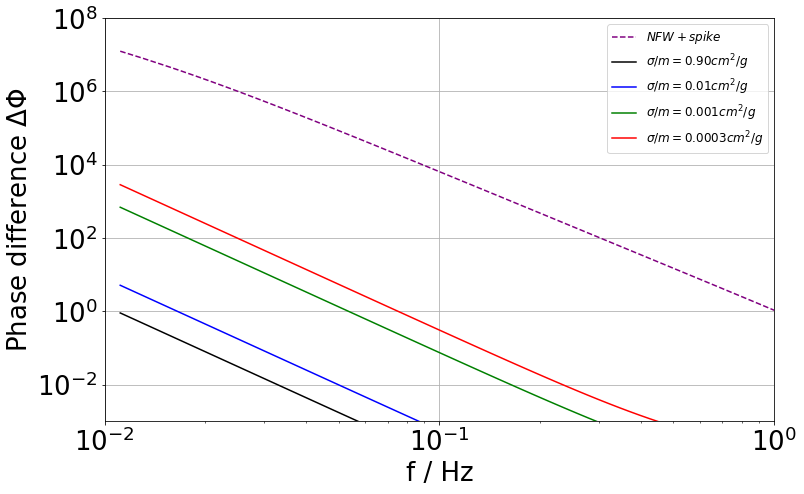

<Figure size 864x533.981 with 0 Axes>

In [53]:
plt.figure(figsize=(12,12/golden_ratio))

PhiT0int = interp1d(f_gw0, PhiT0, kind='cubic', bounds_error=False, fill_value=(0., 0.))

Phi0 = - 2.*(8.*np.pi*sp_0.m_chirp()*f_gw0)**(-5./3.) + 2.*(8.*np.pi*sp_0.m_chirp()*f_gw0[-1])**(-5./3.)
t_c0 =  5./256. * R0**4/sp_0.m_total()**2 / sp_0.m_reduced()
tpt0 = -5./4. * (8.*np.pi*sp_0.m_chirp()*f_gw0)**(-5./3.)
PhiTild0 = tpt0 - Phi0
#PhiT0int = interp1d(f_gw0,  PhiTild0, kind='cubic', bounds_error=False, fill_value=(0., 0.))

#plt.plot(f_gw0/ms.hz_to_invpc , PhiT0 ,color='yellow', label=r'$\tilde{\Phi}_0$')
#plt.plot(f_gw0/ms.hz_to_invpc,  PhiTild0, label=r'$\tilde{\Phi}^{analytic}_0$')
#plt.plot(f_gw0/ms.hz_to_invpc, np.abs(PhiT0 - PhiTild0) , label=r'$\Delta\tilde{\Phi}_0$')

#plt.plot(f_gw1/ms.hz_to_invpc, np.abs(PhiT1 - PhiT0int(f_gw1)) ,color='black', label='$\Delta\Phi_{SIDM},\sigma/m=0.23cm^2/g$')
#plt.plot(f_gw2/ms.hz_to_invpc, np.abs(PhiT2 - PhiT0int(f_gw2)) ,color='red', label='$\sigma/m=0.07cm^2/g$')
#plt.plot(f_gw3/ms.hz_to_invpc, np.abs(PhiT3 - PhiT0int(f_gw3)) ,color='blue', label='$\sigma/m=0.01cm^2/g$')
plt.plot(f_gw4/ms.hz_to_invpc, np.abs(PhiT4 - PhiT0int(f_gw4)) ,'--',color='purple', label='$NFW + spike$')
plt.plot(f_gw5/ms.hz_to_invpc, np.abs(PhiT5 - PhiT0int(f_gw5)) ,color='black', label='$\sigma/m=0.90cm^2/g$')
plt.plot(f_gw7/ms.hz_to_invpc, np.abs(PhiT7 - PhiT0int(f_gw7)) ,color='blue', label='$\sigma/m=0.01cm^2/g$')
plt.plot(f_gw8/ms.hz_to_invpc, np.abs(PhiT8 - PhiT0int(f_gw8)) ,color='green', label='$\sigma/m=0.001cm^2/g$')
plt.plot(f_gw6/ms.hz_to_invpc, np.abs(PhiT6 - PhiT0int(f_gw6)) ,color='red', label='$\sigma/m=0.0003cm^2/g$')

plt.xlabel('f / Hz'); plt.xscale('log')
plt.ylabel('Phase difference $\Delta \Phi$'); plt.yscale('log')
plt.ylim([1e-3,1e8]); plt.xlim([1e-2,1])
plt.yticks([1e-2,1,1e2,1e4,1e6,1e8])
plt.legend(prop={'size': 12}); plt.grid()

plt.figure(figsize=(12,12/golden_ratio))

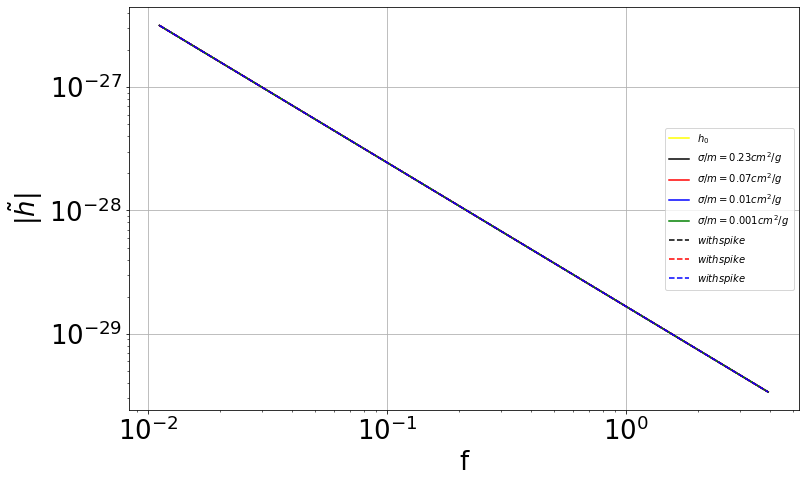

In [28]:
h0int = interp1d(f_gw0, h0, kind='cubic', bounds_error=False, fill_value=(0.,0.))
plt.figure(figsize=(12,12/golden_ratio))

plt.plot(f_gw0/ms.hz_to_invpc, h0 ,color='yellow', label='$h_0$')

plt.plot(f_gw1/ms.hz_to_invpc, h1 ,color='black', label='$\sigma/m=0.23cm^2/g$')
#plt.plot(f_gw1/ms.hz_to_invpc, np.abs(h1-h0int(f_gw1)) , label='$\Delta h_1$')

plt.plot(f_gw2/ms.hz_to_invpc, h2 ,color='red', label='$\sigma/m=0.07cm^2/g$')
#plt.plot(f_gw2/ms.hz_to_invpc, np.abs(h2-h0int(f_gw2)) , label='$\Delta h_1$')

plt.plot(f_gw3/ms.hz_to_invpc, h3 ,color='blue', label='$\sigma/m=0.01cm^2/g$')
#plt.plot(f_gw3/ms.hz_to_invpc, np.abs(h3-h0int(f_gw3)) , label='$\Delta h_1$')

plt.plot(f_gw4/ms.hz_to_invpc, h4 ,color='green', label='$\sigma/m=0.001cm^2/g$')
#plt.plot(f_gw4/ms.hz_to_invpc, np.abs(h4-h0int(f_gw4)) , label='$\Delta h_1$')

plt.plot(f_gw5/ms.hz_to_invpc, h5 ,'--',color='black', label='$with spike$')
#plt.plot(f_gw5/ms.hz_to_invpc, np.abs(h5-h0int(f_gw5)) , label='$\Delta h_1$')

plt.plot(f_gw6/ms.hz_to_invpc, h6 ,'--',color='red', label='$with spike$')
#plt.plot(f_gw6/ms.hz_to_invpc, np.abs(h6-h0int(f_gw6)) , label='$\Delta h_1$')

plt.plot(f_gw7/ms.hz_to_invpc, h7 ,'--',color='blue', label='$with spike$')
#plt.plot(f_gw7/ms.hz_to_invpc, np.abs(h7-h0int(f_gw7)) , label='$\Delta h_1$')

#plt.plot(f_gw8/ms.hz_to_invpc, h8 ,'--',color='green', label='$with spike$')
#plt.plot(f_gw8/ms.hz_to_invpc, np.abs(h8-h0int(f_gw8)) , label='$\Delta h_1$')


plt.xscale('log')
plt.xlabel('f')
plt.yscale('log')
plt.ylabel(r'$|\tilde{h}|$')
plt.legend(prop={'size': 10},loc='right'); plt.grid()

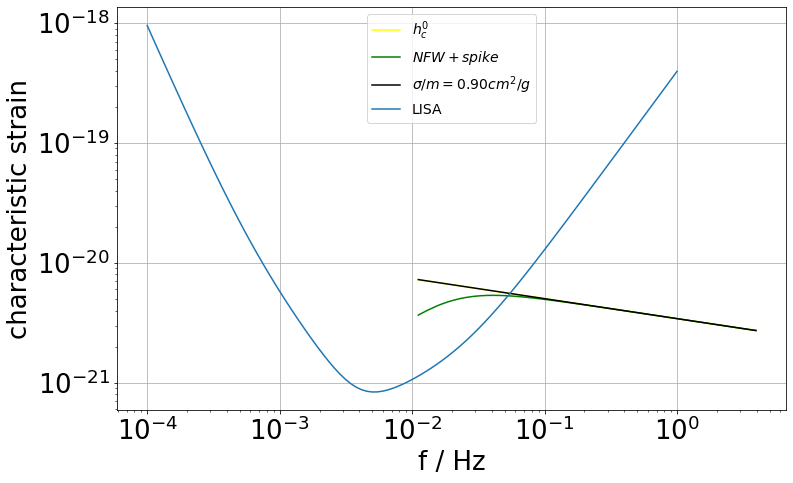

In [60]:
plt.figure(figsize=(12,12/golden_ratio))

plt.plot(f_gw0/ms.hz_to_invpc, 2.*f_gw0*h0 ,color='yellow', label='$h_c^0$')

#plt.plot(f_gw1/ms.hz_to_invpc, 2.*f_gw1*h1 ,color='black', label='$sidm$')

plt.plot(f_gw4/ms.hz_to_invpc, 2.*f_gw4*h4 ,color='green', label='$NFW + spike$')

plt.plot(f_gw5/ms.hz_to_invpc, 2.*f_gw5*h5 ,color='black', label='$\sigma/m=0.90cm^2/g$')

#plt.plot(f_gw7/ms.hz_to_invpc, 2.*f_gw7*h7 ,'--',color='black', label='$\sigma/m=0.23cm^2/g$')

#plt.plot(f_gw8/ms.hz_to_invpc, 2.*f_gw8*h8 ,'--',color='black', label='$\sigma/m=0.23cm^2/g$')

#plt.plot(f_gw6/ms.hz_to_invpc, 2.*f_gw6*h6 ,'--',color='black', label='$\sigma/m=0.23cm^2/g$')

#plt.plot(f_gw8/ms.hz_to_invpc, 2.*f_gw8*h8 ,'--',color='green', label='$h_c^{spike}$')

f = np.geomspace(detector.Lisa().Bandwith()[0], detector.Lisa().Bandwith()[1], 100)
plt.plot(f/ms.hz_to_invpc, detector.Lisa().NoiseStrain(f), label='LISA')

plt.xscale('log')
plt.xlabel('f / Hz')
plt.yscale('log')
plt.ylabel('characteristic strain')
plt.legend(prop={'size': 14}); plt.grid()


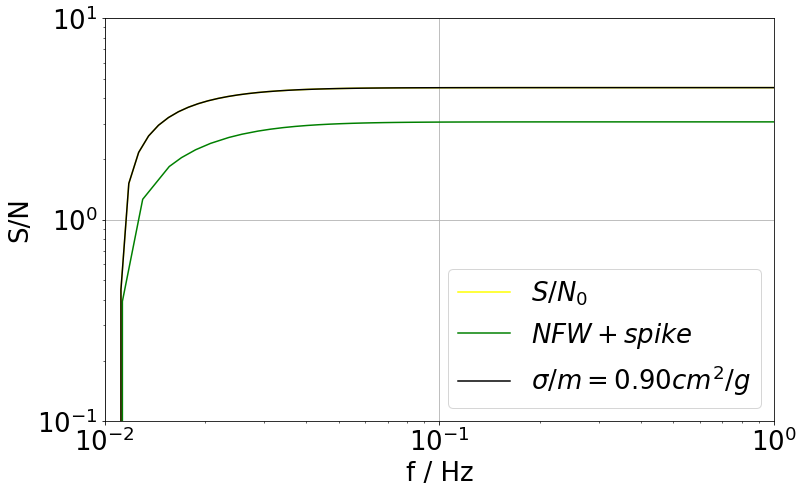

In [64]:
###################
plt.figure(figsize=(12,12/golden_ratio))

SoN0 = detector.SignalToNoise(f_gw0, interp1d(f_gw0, h0, kind='cubic', bounds_error=False, fill_value=(0.,0.)),  detector.Lisa())
#SoN1 = detector.SignalToNoise(f_gw1, interp1d(f_gw1, h1, kind='cubic', bounds_error=False, fill_value=(0.,0.)),  detector.Lisa())
SoN4 = detector.SignalToNoise(f_gw4, interp1d(f_gw4, h4, kind='cubic', bounds_error=False, fill_value=(0.,0.)),  detector.Lisa())
SoN5 = detector.SignalToNoise(f_gw5, interp1d(f_gw5, h5, kind='cubic', bounds_error=False, fill_value=(0.,0.)),  detector.Lisa())
#SoN8 = detector.SignalToNoise(f_gw8, interp1d(f_gw8, h8, kind='cubic', bounds_error=False, fill_value=(0.,0.)),  detector.Lisa())

plt.plot(f_gw0/ms.hz_to_invpc, SoN0 ,color='yellow', label='$S/N_0$')
#plt.plot(f_gw1/ms.hz_to_invpc, SoN1 ,color='black', label='$S/N_{\sigma/m=0.23cm^2/g}$')
plt.plot(f_gw4/ms.hz_to_invpc, SoN4 ,color='green', label='$NFW + spike$')
plt.plot(f_gw5/ms.hz_to_invpc, SoN5 ,color='black', label='$\sigma/m=0.90cm^2/g$')
#plt.plot(f_gw8/ms.hz_to_invpc, SoN8 ,'--',color='green', label='$S/N_{spike}$')

plt.xscale('log')
plt.xlabel('f / Hz')
plt.yscale('log')
plt.ylabel('S/N')
plt.ylim([1e-1,1e1]); plt.xlim([1e-2,1])
plt.yticks([1e-1,1e0,1e1])
plt.legend(); plt.grid();


plt.show()


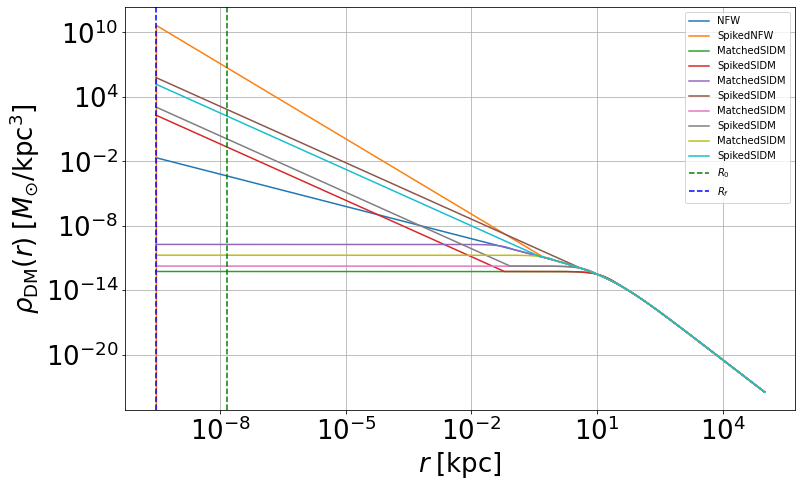

In [45]:
# This is a function that plots the density for any object that has a density (and mass) attribute
def plotHalo(halo, r_grid):
    #np.geomspace(1, 1e5)
    l, = ax_rho.loglog(r_grid, halo.density(r_grid), label=str(halo))
    #ax_m.loglog(r_grid, halo.mass(r_grid), linestyle='--', color=l.get_c()) #halo.mass
    #ax_m.loglog(r_grid, DMHalo.mass(halo, r_grid), linestyle='-.', color=l.get_c()) # check mass function

M200 = 1e6   # M_sun
c = 6.6

#r_m = 0.080
#r_m2 = 0.001
#m1 = 1e3

#nfw = NFW(3.8e-22*(3e21)**3/2e33, 23.1e-3)  #NFW.FromVirial(M200,c)
#sp_nfw = Spike_NFW.FromNFW(nfw, m1, 7./3.)
#sidm = MatchedSIDM.matching(nfw, r_m)
#sidm2 = MatchedSIDM.matching(nfw, r_m2)
#sp_sidm = SpikedSIDM.FromBH(sidm, m1, 7./4.)
#sp_sidm2 = SpikedSIDM.FromBH(sidm2, m1, 7./4.)

#sigma_m1 = sidm.find_sigma_m(nfw,r_m,10e9)
#print('cross section = ',sigma_m1)
#print(sidm.core_dynamic(r_m))
#iso = sidm.inner # for reference


r_grid = np.geomspace(1e3 * 4.8e-14*6,1e5, 1000)
plt.figure(figsize=(12,12/golden_ratio))
#ax_rho.title('$\sigma$')
ax_rho = plt.gca(); ax_rho.set_xlabel(r'$r\;{\rm[kpc]}$');  ax_rho.set_ylabel(r'$\rho_{\rm DM}(r) \;[M_{\odot}{\rm / kpc^3]}$')
#ax_m = ax_rho.twinx(); ax_m.set_ylabel("$M(<r)$")

#plotHalo(iso, r_grid)
plotHalo(nfw, r_grid)
plotHalo(sp_nfw, r_grid)
plotHalo(sidm, r_grid)
plotHalo(sp_sidm,r_grid)
plotHalo(sidm2, r_grid)
plotHalo(sp_sidm2,r_grid)
plotHalo(sidm3,r_grid)
plotHalo(sp_sidm3,r_grid)
plotHalo(sidm4,r_grid)
plotHalo(sp_sidm4,r_grid)

#ax_rho.axvline(r_m,color='yellow', linestyle='--', label='$r_m$')
ax_rho.axvline(1.44e-8, color='green', linestyle='--', label='$R_0$')
ax_rho.axvline(2.88e-10,color='blue', linestyle='--', label='$R_f$')

ax_rho.legend(prop={'size': 10}); ax_rho.grid();